In [1]:
import json
import pandas as pd
import numpy as np
from tqdm import trange, notebook
from bs4 import BeautifulSoup
import requests, time
import random
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./1126_Userinventory_Fin.csv")

C:\Users\msh20\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722

In [3]:
df.head()

,Unnamed: 0,user_id,0,1,2,3,4,5,6,7,...,4409,4410,4411,4412,4413,4414,4415,4416,4417,4418
0,0,76561198807142275,"{'appid': 227300, 'name': 'Euro Truck Simulato...","{'appid': 242920, 'name': 'Banished', 'playtim...","{'appid': 218620, 'name': 'PAYDAY 2', 'playtim...","{'appid': 271590, 'name': 'Grand Theft Auto V'...","{'appid': 730, 'name': 'Counter-Strike: Global...","{'appid': 292030, 'name': 'The Witcher 3: Wild...","{'appid': 550900, 'name': 'Metin2', 'playtime_...","{'appid': 578080, 'name': ""PLAYERUNKNOWN'S BAT...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,76561198099451925,"{'appid': 4000, 'name': ""Garry's Mod"", 'playti...","{'appid': 4560, 'name': 'Company of Heroes - L...","{'appid': 228200, 'name': 'Company of Heroes '...","{'appid': 220, 'name': 'Half-Life 2', 'playtim...","{'appid': 340, 'name': 'Half-Life 2: Lost Coas...","{'appid': 320, 'name': 'Half-Life 2: Deathmatc...","{'appid': 360, 'name': 'Half-Life Deathmatch: ...","{'appid': 380, 'name': 'Half-Life 2: Episode O...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,76561198208050003,"{'appid': 4560, 'name': 'Company of Heroes - L...","{'appid': 9340, 'name': 'Company of Heroes: Op...","{'appid': 20540, 'name': 'Company of Heroes: T...","{'appid': 228200, 'name': 'Company of Heroes '...","{'appid': 8930, 'name': ""Sid Meier's Civilizat...","{'appid': 35130, 'name': 'Lara Croft and the G...","{'appid': 227300, 'name': 'Euro Truck Simulato...","{'appid': 47410, 'name': 'Stronghold Kingdoms'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,76561198033424233,"{'appid': 6860, 'name': 'Hitman: Blood Money',...","{'appid': 4560, 'name': 'Company of Heroes - L...","{'appid': 228200, 'name': 'Company of Heroes '...","{'appid': 320, 'name': 'Half-Life 2: Deathmatc...","{'appid': 340, 'name': 'Half-Life 2: Lost Coas...","{'appid': 20900, 'name': 'The Witcher: Enhance...","{'appid': 2820, 'name': 'X3: Terran Conflict',...","{'appid': 17470, 'name': 'Dead Space', 'playti...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,76561198003838429,"{'appid': 240, 'name': 'Counter-Strike: Source...","{'appid': 4000, 'name': ""Garry's Mod"", 'playti...","{'appid': 7940, 'name': 'Call of Duty 4: Moder...","{'appid': 8190, 'name': 'Just Cause 2', 'playt...","{'appid': 50130, 'name': 'Mafia II (Classic)',...","{'appid': 1030830, 'name': 'Mafia II: Definiti...","{'appid': 33910, 'name': 'Arma 2', 'playtime_f...","{'appid': 33930, 'name': 'Arma 2: Operation Ar...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.drop(["user_id"], axis=1, inplace=True)

In [5]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,4409,4410,4411,4412,4413,4414,4415,4416,4417,4418
0,"{'appid': 227300, 'name': 'Euro Truck Simulato...","{'appid': 242920, 'name': 'Banished', 'playtim...","{'appid': 218620, 'name': 'PAYDAY 2', 'playtim...","{'appid': 271590, 'name': 'Grand Theft Auto V'...","{'appid': 730, 'name': 'Counter-Strike: Global...","{'appid': 292030, 'name': 'The Witcher 3: Wild...","{'appid': 550900, 'name': 'Metin2', 'playtime_...","{'appid': 578080, 'name': ""PLAYERUNKNOWN'S BAT...","{'appid': 648800, 'name': 'Raft', 'playtime_2w...","{'appid': 466240, 'name': 'Deceit', 'playtime_...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'appid': 4000, 'name': ""Garry's Mod"", 'playti...","{'appid': 4560, 'name': 'Company of Heroes - L...","{'appid': 228200, 'name': 'Company of Heroes '...","{'appid': 220, 'name': 'Half-Life 2', 'playtim...","{'appid': 340, 'name': 'Half-Life 2: Lost Coas...","{'appid': 320, 'name': 'Half-Life 2: Deathmatc...","{'appid': 360, 'name': 'Half-Life Deathmatch: ...","{'appid': 380, 'name': 'Half-Life 2: Episode O...","{'appid': 11450, 'name': 'Overlord', 'playtime...","{'appid': 500, 'name': 'Left 4 Dead', 'playtim...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'appid': 4560, 'name': 'Company of Heroes - L...","{'appid': 9340, 'name': 'Company of Heroes: Op...","{'appid': 20540, 'name': 'Company of Heroes: T...","{'appid': 228200, 'name': 'Company of Heroes '...","{'appid': 8930, 'name': ""Sid Meier's Civilizat...","{'appid': 35130, 'name': 'Lara Croft and the G...","{'appid': 227300, 'name': 'Euro Truck Simulato...","{'appid': 47410, 'name': 'Stronghold Kingdoms'...","{'appid': 218230, 'name': 'PlanetSide 2', 'pla...","{'appid': 1083500, 'name': 'PlanetSide 2 - Tes...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
count_lst=[]
num_lst=list(range(df.shape[1]))
for i in range(df.shape[1]):
    count_lst.append(df[str(i)].count())

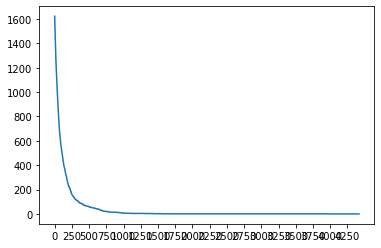

In [7]:
plt.figure()
plt.plot(num_lst,count_lst)
plt.xticks(range(0,df.shape[1],250))
plt.show()

In [8]:
limit_df=df.iloc[:,0:200]

In [9]:
limit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Columns: 200 entries, 0 to 199
dtypes: object(200)
memory usage: 2.5+ MB


In [10]:
limit_df=df.iloc[0:1000,0:100]

In [11]:
limit_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,"{'appid': 227300, 'name': 'Euro Truck Simulato...","{'appid': 242920, 'name': 'Banished', 'playtim...","{'appid': 218620, 'name': 'PAYDAY 2', 'playtim...","{'appid': 271590, 'name': 'Grand Theft Auto V'...","{'appid': 730, 'name': 'Counter-Strike: Global...","{'appid': 292030, 'name': 'The Witcher 3: Wild...","{'appid': 550900, 'name': 'Metin2', 'playtime_...","{'appid': 578080, 'name': ""PLAYERUNKNOWN'S BAT...","{'appid': 648800, 'name': 'Raft', 'playtime_2w...","{'appid': 466240, 'name': 'Deceit', 'playtime_...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'appid': 4000, 'name': ""Garry's Mod"", 'playti...","{'appid': 4560, 'name': 'Company of Heroes - L...","{'appid': 228200, 'name': 'Company of Heroes '...","{'appid': 220, 'name': 'Half-Life 2', 'playtim...","{'appid': 340, 'name': 'Half-Life 2: Lost Coas...","{'appid': 320, 'name': 'Half-Life 2: Deathmatc...","{'appid': 360, 'name': 'Half-Life Deathmatch: ...","{'appid': 380, 'name': 'Half-Life 2: Episode O...","{'appid': 11450, 'name': 'Overlord', 'playtime...","{'appid': 500, 'name': 'Left 4 Dead', 'playtim...",...,"{'appid': 290080, 'name': 'Life is Feudal: You...","{'appid': 700030, 'name': 'Life is Feudal: MMO...","{'appid': 295110, 'name': 'Just Survive', 'pla...","{'appid': 362300, 'name': 'Just Survive Test S...","{'appid': 433850, 'name': 'Z1 Battle Royale', ...","{'appid': 439700, 'name': 'H1Z1: Test Server',...","{'appid': 289130, 'name': 'Endless Legend™ - E...","{'appid': 298610, 'name': 'Ylands', 'playtime_...","{'appid': 299700, 'name': 'Face of Mankind', '...","{'appid': 299740, 'name': 'Miscreated', 'playt..."
2,"{'appid': 4560, 'name': 'Company of Heroes - L...","{'appid': 9340, 'name': 'Company of Heroes: Op...","{'appid': 20540, 'name': 'Company of Heroes: T...","{'appid': 228200, 'name': 'Company of Heroes '...","{'appid': 8930, 'name': ""Sid Meier's Civilizat...","{'appid': 35130, 'name': 'Lara Croft and the G...","{'appid': 227300, 'name': 'Euro Truck Simulato...","{'appid': 47410, 'name': 'Stronghold Kingdoms'...","{'appid': 218230, 'name': 'PlanetSide 2', 'pla...","{'appid': 1083500, 'name': 'PlanetSide 2 - Tes...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'appid': 6860, 'name': 'Hitman: Blood Money',...","{'appid': 4560, 'name': 'Company of Heroes - L...","{'appid': 228200, 'name': 'Company of Heroes '...","{'appid': 320, 'name': 'Half-Life 2: Deathmatc...","{'appid': 340, 'name': 'Half-Life 2: Lost Coas...","{'appid': 20900, 'name': 'The Witcher: Enhance...","{'appid': 2820, 'name': 'X3: Terran Conflict',...","{'appid': 17470, 'name': 'Dead Space', 'playti...","{'appid': 24740, 'name': 'Burnout Paradise: Th...","{'appid': 1250, 'name': 'Killing Floor', 'play...",...,"{'appid': 230410, 'name': 'Warframe', 'playtim...","{'appid': 238960, 'name': 'Path of Exile', 'pl...","{'appid': 224580, 'name': 'Arma 2: DayZ Mod', ...","{'appid': 107410, 'name': 'Arma 3', 'playtime_...","{'appid': 233450, 'name': 'Prison Architect', ...","{'appid': 113020, 'name': 'Monaco', 'playtime_...","{'appid': 234650, 'name': 'Shadowrun Returns',...","{'appid': 65930, 'name': 'The Bureau: XCOM Dec...","{'appid': 215530, 'name': 'The Incredible Adve...","{'appid': 72850, 'name': 'The Elder Scrolls V:..."
4,"{'appid': 240, 'name': 'Counter-Strike: Source...","{'appid': 4000, 'name': ""Garry's Mod"", 'playti...","{'appid': 7940, 'name': 'Call of Duty 4: Moder...","{'appid': 8190, 'name': 'Just Cause 2', 'playt...","{'appid': 50130, 'name': 'Mafia II (Classic)',...","{'appid': 1030830, 'name': 'Mafia II: Definiti...","{'appid': 33910, 'name': 'Arma 2', 'playtime_f...","{'appid': 33930, 'name': 'Arma 2: Operation Ar...","{'appid': 219540, 'name': 'Arma 2: Operation A...","{'appid': 55100, 'name': 'Homefront', 'playtim...",...,"{'appid': 270270, 'name': 'Frozen State', 'pla...","{'appid': 239840, 'name': 'Dead State', 'playt...","{'appid': 270880, 'name': 'American Truck Simu...","{'appid': 550, 'name': 'Left 4 D

In [12]:
test_limit_df=limit_df.iloc[1500:1600,150:200]
column_name=list(range(test_limit_df.shape[1]))
test_limit_df.columns=column_name
test_limit_df.reset_index(drop=True,inplace=True)

In [13]:
test_limit_df

""


In [14]:
limit_df.shape[1]

100

In [15]:
test_limit_df.shape[1]

0

In [16]:
def user_own_game(init_df,new_df,game_lst):
    for game_name in notebook.tqdm(game_lst):
        temp_lst=[]
        for index in notebook.tqdm(range(len(init_df))):
            count=1
            found=False
            while(count<init_df.shape[1]):
                for name in range(init_df.shape[1]):
                    try:
                        if json.loads(init_df.loc[index][name].replace("'","\""))["name"]==game_name:
                            if json.loads(init_df.loc[index][name].replace("'","\""))["playtime_forever"]>24*2:
                                temp_lst.append(json.loads(init_df.loc[index][name].replace("'","\""))["playtime_forever"])
                                count=init_df.shape[1]
                                found=True
                            else:
                                count=init_df.shape[1]
                        else:
                            count+=1
                    except:
                        count+=1
                        continue
            if found==True:
                continue
            else:
                temp_lst.append(None)
        new_df[str(game_name)]=temp_lst

In [17]:
def column_attr(init_df,name_lst):
    temp_set=set()
    for index in notebook.tqdm(range(len(init_df))):
        for name in range(init_df.shape[1]):
            try:
                if type(init_df.loc[index][name])==type(""):
                    temp_name=json.loads(init_df.loc[index][name].replace("'","\""))["name"]
                    temp_set.add(temp_name)
            except:
                continue
    for value in temp_set:
        name_lst.append(value)

In [18]:
name_lst=[]
column_attr(limit_df, name_lst)

In [20]:
len(name_lst)

5411

In [21]:
limit_name_lst=name_lst[0:1000]

In [22]:
new_df=pd.DataFrame()

In [23]:
user_own_game(limit_df,new_df,limit_name_lst)

In [24]:
new_df

,Dota 2 Player Profiles: Not Playing Dota With Virtus.Pro,NEKO-NIN exHeart,Penumbra: Black Plague,Chess Ultra,Tomb Raider: Legend,Guns of Icarus Online,Men of War: Vietnam,DEEP SPACE WAIFU: FANTASY,Tribes: Ascend,Chocolate makes you happy 3,...,Deepworld,SONIC THE HEDGEHOG 4 Episode II,Ghostdream,Sacrifice,Epic Arena,Next Day: Survival,Guacamelee! Super Turbo Championship Edition,Halo: Spartan Strike,Earth 2160,Lightblade VR
0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,None,None,NaN,None,NaN,None,NaN,NaN,NaN
1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,None,None,NaN,None,NaN,None,NaN,NaN,NaN
2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,None,None,NaN,None,NaN,None,NaN,NaN,NaN
3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,None,None,NaN,None,NaN,None,NaN,NaN,NaN
4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,None,None,NaN,None,NaN,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,None,None,NaN,None,NaN,None,NaN,NaN,NaN
996,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,None,None,NaN,None,NaN,None,NaN,NaN,NaN
997,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,None,None,NaN,None,NaN,None,NaN,NaN,NaN
998,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,None,None,NaN,None,NaN,None,NaN,NaN,NaN


In [25]:
new_df.to_csv("user_inventory_fin.csv")